In [70]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from audio.fourier import F
from audio.filters import low_pass
import audio.index
import audio.io
from audio.quantizers import *

In [12]:
df = 16000

Sous-Echantillonage
===================

In [60]:
data = audio.index.search("vodka")[0].parent.audio
audio.io.play(data, df=df)


In [61]:
data2 = data[::2]
audio.io.play(data, df=df)
audio.io.play(data2,df=0.5*df)

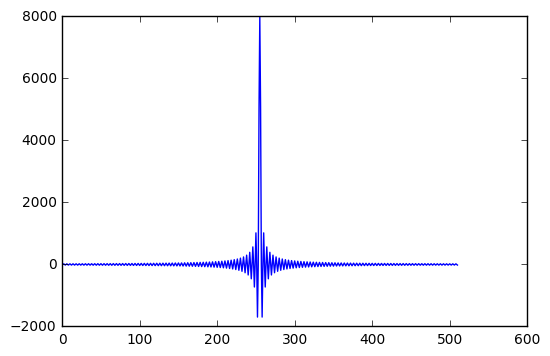

In [53]:
h=low_pass(fc=4000.0, dt=1.0/df)(511)
figure()
plot(h)


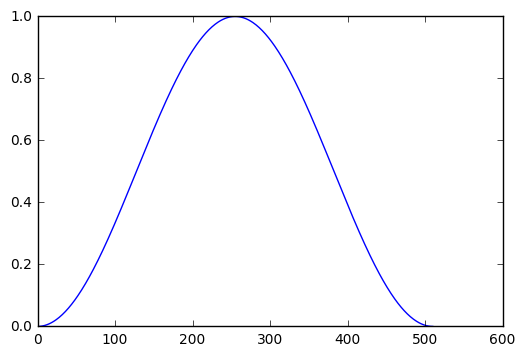

In [54]:
window = hanning(511)
plot(window)

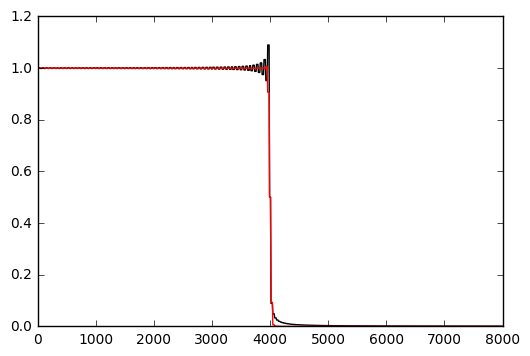

In [56]:
Fh = F(h, dt=1.0/df, power_of_two=True)
f = r_[0:0.5*df:0.5*df/1000.0]
figure()
plot(f, abs(Fh(f)), "k")
h2 = h * window
Fh2 = F(h2, dt=1.0/df, power_of_two=True)
plot(f, abs(Fh2(f)), "r")

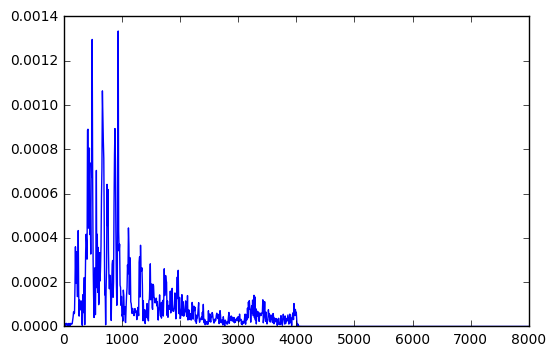

In [66]:
data2b = (dt*convolve(h2, data))
Ff = F(data2b, dt=1.0/df, power_of_two=True)
f = r_[0:0.5*df:0.5*df/1000.0]
figure()
#plot(data2b)
plot(f, abs(Ff(f)), "b")
data2b = data2b[::2]

In [67]:
audio.io.play(data, df=df)
audio.io.play(data2, df=0.5*df)
audio.io.play(data2b, df=0.5*df)

<IPython.core.display.Javascript object>


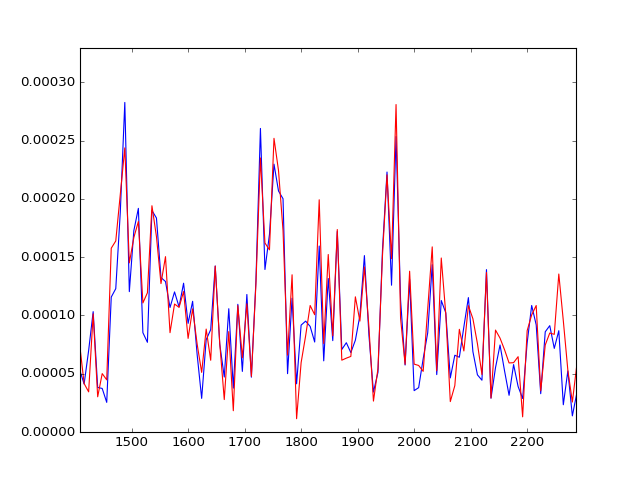

In [36]:
Ff = F(data, dt=1.0/df, power_of_two=True)
f = r_[0:0.5*df:0.5*df/1000.0]
Ff2 = F(data2, dt=1.0/(0.5*df), power_of_two=True)
f2 = r_[0:0.25*df:0.25*df/500.0]
figure()
plot(f, abs(Ff(f)), "b")
plot(f2, abs(Ff2(f2)), "r")

In [38]:
dt = 1.0 / df
t = r_[0:2.0:dt]
data = 0.5*(sin(2*pi*440.0*t) + sin(2*pi*7000.0*t))
audio.io.play(data, df=df)
data2 = data[::2]
audio.io.play(data2, df=0.5*df)

<IPython.core.display.Javascript object>


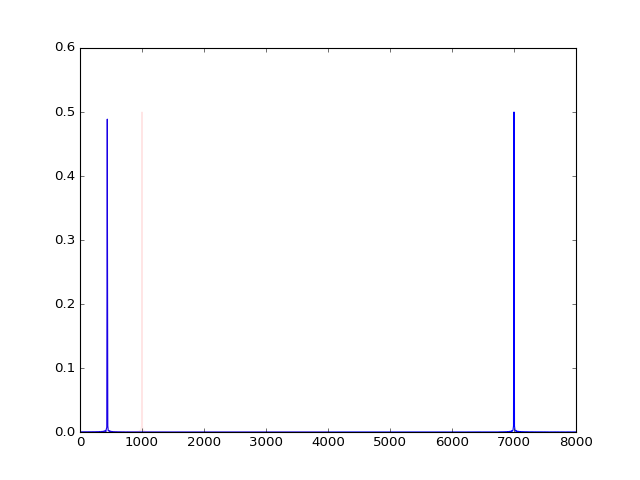

In [41]:
Ff = F(data, dt=1.0/df, power_of_two=True)
f = r_[0:0.5*df:0.5*df/1000.0]
Ff2 = F(data2, dt=1.0/(0.5*df), power_of_two=True)
f2 = r_[0:0.25*df:0.25*df/500.0]
figure()
plot(f, abs(Ff(f)), "b")
plot(f2, abs(Ff2(f2)), "r", alpha=0.1)

Quantification
==============

In [68]:
def SNR(quantizer, data):
    out = quantizer(data)
    b = out - data
    SNR2 = sum(data*data) / sum(b*b)
    return 10.0*log10(SNR2)

In [78]:
quantizer = Uniform(low=-1.0, high=1.0, N=2**8)
print SNR(quantizer, data), "dB"
quantizer = Uniform(low=-1.0, high=1.0, N=2**9)
print SNR(quantizer, data), "dB"
quantizer = Uniform(low=-1.0, high=1.0, N=2**16)
print SNR(quantizer, data), "dB"
print quantizer(0.0)
quantizer = Uniform(low=-1.0, high=1.0, N=2**16-1)
print SNR(quantizer, data), "dB"
quantizer = Uniform(low=-1.0, high=1.0, N=2**8-1)
print "8 bits uniform:", SNR(quantizer, data), "dB"
quantizer = mulaw
print "8 bits mulaw:", SNR(quantizer, data), "dB"

12.3510812436 dB
18.7571632958 dB
57.2203688924 dB
1.52587890625e-05
96.3294660758 dB
8 bits uniform: 15.1167582148 dB
8 bits mulaw: 35.605110393 dB
